# Capstone project (a model predicting readmission for patients with diabetes)

 In this project I will demonstrate how to build a model predicting readmission for patients with diabetes in Python using the following steps
- data exploration
- feature engineering
- building training/validation/test samples
- model selection
- model evaluation

# Project definition

 Predict if a patient with diabetes will be readmitted to the hospital within 30 days. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [2]:
df=pd.read_csv(r"C:\Users\jitendra\Downloads\BIA-main\Capstone project 08.03.2023\diabetic_data.csv")

In [3]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [4]:
print("Number of samples:", len(df))

Number of samples: 101766


In [5]:
df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


In [6]:
df.groupby('readmitted').size()

readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

In [7]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [8]:
df=df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [9]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [10]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [11]:
df['Output_Label'] = (df.readmitted == '<30').astype('int')

C:\Users\jitendra\AppData\Local\Temp\ipykernel_13648\4294123879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Output_Label'] = (df.readmitted == '<30').astype('int')


In [12]:
df['Output_Label'].unique()

array([0, 1])

In [13]:
def calc_prevalence(y_actual):
    return(sum(y_actual)/len(y_actual))

In [14]:
print('Prevalence:%.3f'%calc_prevalence(df['Output_Label'].values))

Prevalence:0.114


#Around 11% of the population is rehospitalized. This represented an imbalanced classification problem so we will address that below.

In [15]:
# print('Number of columns:',len(df.columns))

In [16]:
df['Output_Label'].sum()

11314

In [17]:
df['Output_Label'].value_counts()

0    88029
1    11314
Name: Output_Label, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

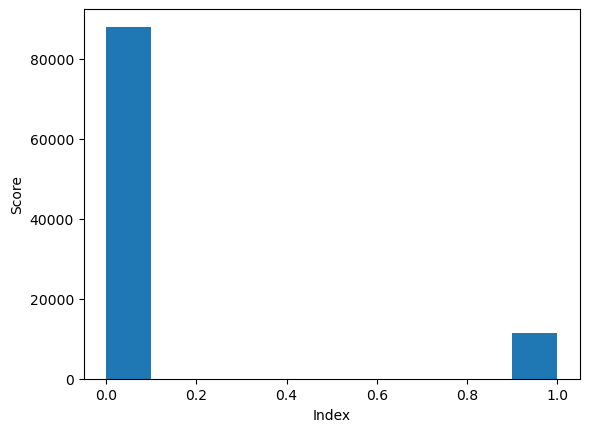

In [18]:
plt.hist(df['Output_Label'])
plt.xlabel('Index')
plt.ylabel('Score')
plt.show

In [19]:

print('Number of columns', len(df.columns))

Number of columns 51


In [20]:
df[list(df.columns)[:20]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157


In [21]:
df[list(df.columns)[20:40]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No


In [22]:
df[list(df.columns)[40:51]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Output_Label
0,No,No,No,No,No,No,No,No,No,NO,0
1,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,No,No,No,No,No,No,No,No,Yes,NO,0
3,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [23]:
for c in list(df.columns):
    n= df[c].unique()
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ':' +str(len(n)) + 'unique values')

encounter_id:99343unique values
patient_nbr:69990unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty:73unique values
num_lab_procedures:118unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications:75unique values
number_outpatient:39unique values
number_emergency:33unique values
number_inpatient
[ 0  1  2  3  6  5  4  7  9  8

(array([1.6307e+04, 9.3280e+03, 8.7350e+03, 3.8490e+03, 6.1410e+03,
        1.5150e+03, 4.4110e+03, 3.6620e+03, 1.6450e+03, 6.8210e+03,
        3.6080e+03, 2.4450e+03, 2.2160e+03, 1.6930e+03, 2.9600e+03,
        9.1200e+02, 2.8810e+03, 1.1590e+03, 1.0760e+03, 1.2720e+03,
        8.2100e+02, 4.7300e+02, 2.4200e+02, 2.3500e+02, 1.7270e+03,
        7.7800e+02, 7.5500e+02, 7.8800e+02, 5.7800e+02, 5.1100e+02,
        7.7700e+02, 6.1300e+02, 5.6200e+02, 7.0900e+02, 3.8800e+02,
        2.1800e+02, 3.7400e+02, 1.6100e+02, 1.8200e+02, 4.4500e+02,
        4.1800e+02, 2.0600e+02, 1.2200e+02, 2.2400e+02, 2.2900e+02,
        2.9400e+02, 1.4500e+02, 1.3400e+02, 3.7800e+02, 1.7600e+02,
        2.2700e+02, 7.5000e+01, 1.3000e+02, 1.6100e+02, 1.0000e+02,
        1.2800e+02, 1.1000e+02, 1.8300e+02, 1.4000e+02, 2.1600e+02,
        1.0200e+02, 1.2500e+02, 6.3000e+01, 4.7000e+01, 6.4000e+01,
        4.0000e+01, 5.5000e+01, 1.2900e+02, 7.4000e+01, 6.6000e+01,
        7.7000e+01, 4.1000e+01, 3.0000e+01, 3.80

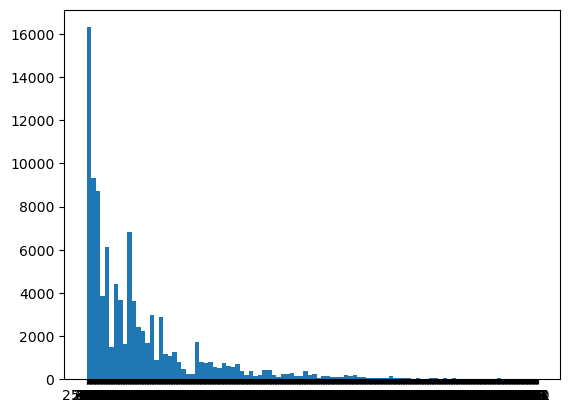

In [24]:
plt.hist(df['diag_1'],bins=100)

# From analysis of the columns, we can see there are a mix of categorical (non-numeric) and numerical data. A few things to point out, 

    - encounter_id and patient_nbr: these are just identifiers and not useful variables
    - age and weight: are categorical in this data set
    - admission_type_id,discharge_disposition_id,admission_source_id: are numerical here, but are IDs (see IDs_mapping). They should be considered categorical. 
    - examide and citoglipton only have 1 value, so we will not use these variables
    - diag1, diag2, diag3 - are categorical and have a lot of values. We will not use these as part of this project, but you could group these ICD codes to reduce the dimension. We will use number_diagnoses to capture some of this information. 
    - medical_speciality - has many categorical variables, so we should consider this when making features. 

# Feature Engineering

In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical features, categorical features and extra features. # 

In this data set, the missing numbers were filled with a question mark. Let's replace it with a nan representation. 

In [25]:
df = df.replace('?',np.nan)  # replacing ? with nan

In [26]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Output_Label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [27]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications','number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [28]:
df[cols_num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

# Categorical Features

The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below. 

The first set of categorical data we will deal with are these columns:

In [29]:
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']


In [30]:
df[cols_cat].isnull().sum()

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
dtype: int64

 Let's check if there are any missing data

`race`, `payer_code`, and `medical_specialty` have missing data. Since these are categorical data, the best thing to do is to just add another categorical type for unknown using the `fillna` function. 

In [31]:
df['race']= df['race'].fillna('UNK')
df['payer_code']= df['payer_code'].fillna('UNK')
df['medical_specialty']=df['medical_specialty'].fillna('UNK')

In [32]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Output_Label
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [33]:
df['payer_code'].value_counts()

UNK    39398
MC     31333
HM      6195
SP      4941
BC      4601
MD      3473
CP      2466
UN      2411
CM      1880
OG      1011
PO       585
DM       545
CH       142
WC       135
OT        92
MP        79
SI        55
FR         1
Name: payer_code, dtype: int64

In [34]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                 48616
InternalMedicine                    14237
Emergency/Trauma                     7419
Family/GeneralPractice               7252
Cardiology                           5279
                                    ...  
Surgery-PlasticwithinHeadandNeck        1
Dermatology                             1
Proctology                              1
Psychiatry-Addictive                    1
Speech                                  1
Length: 73, dtype: int64

In [35]:
top_10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']

df['med_spec']=df['medical_specialty'].copy()
df.loc[~df.med_spec.isin(top_10),'med_spec']='Other'


In [36]:
df['med_spec'].unique()

array(['Other', 'UNK', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Orthopedics', 'Nephrology',
       'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Radiologist'],
      dtype=object)

In [37]:
df['med_spec'].value_counts()

UNK                           48616
InternalMedicine              14237
Other                          8199
Emergency/Trauma               7419
Family/GeneralPractice         7252
Cardiology                     5279
Surgery-General                3059
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Radiologist                    1121
Name: med_spec, dtype: int64

In [38]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
Family/GeneralPractice         7252
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                          8199
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column race, we would create new columns ('race_Caucasian','race_AfricanAmerican', etc). If the patient's race is Caucasian, the patient gets a 1 under 'race_Caucasian' and 0 under the rest of the race columns. To create these one-hot encoding columns, we can use the `get_dummies` function. 

 Now the problem is that if we create a column for each unique value, we have correlated columns. In other words, the value in one column can be figured out by looking at the rest of the columns. For example, if the sample is not AfricanAmerican, Asian, Causasian, Hispance or Other, it must be UNK. To deal with this, we can use the `drop_first` option, which will drop the first categorical value for each column. 

In [39]:
df['admission_type_id'].dtype


dtype('int64')

In [40]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

In [41]:
df.dtypes



encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

 now we converted our numeric data to object to use one hot encoding.

In [42]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [43]:
df_cat

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
101762,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
101763,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
101764,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Output_Label,med_spec
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,NO,0,Other
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,No,No,No,No,Ch,Yes,>30,0,UNK
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,Yes,NO,0,UNK
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,No,No,No,No,Ch,Yes,NO,0,UNK
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,0,UNK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,No,No,No,No,Ch,Yes,>30,0,UNK
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,No,No,No,No,No,Yes,NO,0,UNK
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,No,No,No,No,Ch,Yes,NO,0,UNK
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,No,No,No,No,Ch,Yes,NO,0,Surgery-General


In [45]:
df = pd.concat([df,df_cat], axis = 1)

In [46]:
cols_all_cat = list(df_cat.columns)

In [47]:
cols_all_cat

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gender_Unknown/Invalid',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'tolbutamide_Steady',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'acarbose_No',
 'acarbose_Steady',
 'acarbose_Up',
 'miglitol_No',
 'miglitol_Steady',
 'miglitol_Up',
 'troglitazone_Steady',
 'tolazamide_Steady',
 'tola

In [48]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,0,0,0,0,0,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,0,0,0,0,0,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,0,0,0,0,0,0,0,0,0,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,0,0,0,0,0,0,0,0,0,1
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,0,0,0,0,0,0,0,0,0,1
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_cat1 = list(df.columns)

In [50]:
df_cat1

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'Output_Label',
 'med_spec',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gende

In [51]:

df[['age','weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [52]:

df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [53]:
age_id={'[0-10)':0,
       '[10-20)':0,
        '[20-30)':20,
        '[30-40)':30,
        '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_group'] = df.age.replace(age_id)

In [54]:
df['age_group']

0          0
1          0
2         20
3         30
4         40
          ..
101761    70
101762    80
101763    70
101764    80
101765    70
Name: age_group, Length: 99343, dtype: int64

In [55]:
df.weight.notnull().sum()

3125

In [56]:
df['has_weight'] = df.weight.notnull().astype('int')

In [57]:
cols_extra = ['age_group','has_weight']

In [58]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 143
Numerical Features: 8
Categorical Features: 133
Extra features: 2


In [59]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

time_in_hospital               0
discharge_disposition_id_16    0
admission_type_id_6            0
admission_type_id_7            0
admission_type_id_8            0
discharge_disposition_id_10    0
discharge_disposition_id_12    0
discharge_disposition_id_15    0
discharge_disposition_id_17    0
admission_type_id_4            0
dtype: int64

In [60]:
col2use = cols_num + cols_all_cat + cols_extra


In [61]:
col2use

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gender_Unknown/Invalid',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'tolbutamide_Steady',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosigli

In [62]:
df_data = df[col2use + ['Output_Label']]

In [63]:
df_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,Output_Label
0,1,41,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3,59,0,18,0,0,0,9,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,11,5,13,2,0,1,6,0,0,...,0,0,0,0,0,0,1,20,0,0
3,2,44,1,16,0,0,0,7,0,1,...,0,0,0,0,0,0,1,30,0,0
4,1,51,0,8,0,0,0,5,0,1,...,0,0,0,0,0,0,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,3,51,0,16,0,0,0,9,0,0,...,0,0,0,0,0,0,1,70,0,0
101762,5,33,3,18,0,0,1,9,0,0,...,0,0,0,0,0,0,1,80,0,0
101763,1,53,0,9,1,0,0,13,0,1,...,0,0,0,0,0,0,1,70,0,0
101764,10,45,2,21,0,0,1,9,0,1,...,0,0,0,0,0,1,0,80,0,0


# Building Training/Validation/Test Samples

#So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:
    - Training samples: these samples are used to train the model
    - Validation samples: these samples are held out from the training data and are used to make decisions on how to improve the model
    - Test samples: these samples are held out from all decisions and are used to measure the generalized performance of the model
  
In this project, we will split into 70% train, 30% test. 

The first thing I like to do is to shuffle the samples using `sample` in case there was some order (e.g. all positive samples on top). Here `n` is the number. `random_state` is just specified so the entire class gets the same shuffling. You wouldn't need `random_state` in your own projects.  

In [64]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [65]:
df_data

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,Output_Label
0,3,34,0,19,0,0,1,8,0,1,...,0,0,0,0,0,0,1,80,0,0
1,3,35,0,23,0,0,0,5,0,1,...,0,0,0,0,0,0,0,50,0,0
2,5,78,2,17,0,0,0,9,0,1,...,0,0,0,0,0,0,0,60,0,0
3,1,32,0,9,0,0,0,9,0,0,...,0,0,0,0,0,0,1,50,0,0
4,9,79,1,17,0,0,0,5,0,0,...,0,0,0,0,0,0,0,80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99338,2,33,0,5,0,0,1,8,0,1,...,0,0,0,0,0,0,0,60,0,0
99339,3,32,0,14,0,0,2,8,0,1,...,0,0,0,0,0,0,0,50,0,0
99340,8,45,0,20,0,0,0,9,0,0,...,0,0,0,0,0,0,1,70,0,0
99341,8,65,6,30,0,0,0,9,0,1,...,0,0,0,0,0,0,0,60,0,0


In [66]:
# Save 30% of the data as validation and test data 
df_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_test)/len(df_data)))

Split size: 0.300


In [67]:
# use the rest of the data as training data
df_train=df_data.drop(df_test.index)

In [68]:
df_train

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,race_Caucasian,...,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,age_group,has_weight,Output_Label
0,3,34,0,19,0,0,1,8,0,1,...,0,0,0,0,0,0,1,80,0,0
1,3,35,0,23,0,0,0,5,0,1,...,0,0,0,0,0,0,0,50,0,0
2,5,78,2,17,0,0,0,9,0,1,...,0,0,0,0,0,0,0,60,0,0
3,1,32,0,9,0,0,0,9,0,0,...,0,0,0,0,0,0,1,50,0,0
4,9,79,1,17,0,0,0,5,0,0,...,0,0,0,0,0,0,0,80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99335,6,39,3,16,0,0,0,9,0,1,...,0,0,0,0,1,0,0,60,0,0
99337,1,1,0,13,3,0,0,9,0,1,...,0,0,0,0,0,0,1,50,0,0
99338,2,33,0,5,0,0,1,8,0,1,...,0,0,0,0,0,0,0,60,0,0
99340,8,45,0,20,0,0,0,9,0,0,...,0,0,0,0,0,0,1,70,0,0


At this point, let's check what percent of our groups are hospitalized within 30 days. This is known as prevalence. Ideally, all three groups would have similar prevalance.  

In [69]:
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.Output_Label.values)))
print('Train prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.Output_Label.values)))

Test prevalence(n = 29803):0.115
Train prevalence(n = 69540):0.113


In [70]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_train)),'math didnt work'

all samples (n = 99343)


we have an imbalanced dataset where there are much more negatives than positives, so the model might just assigns all samples as negative. 

In [71]:
df_train.to_csv('df_train.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [72]:
df_train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Asian', 'race_Caucasian',
       ...
       'med_spec_Nephrology', 'med_spec_Orthopedics',
       'med_spec_Orthopedics-Reconstructive', 'med_spec_Other',
       'med_spec_Radiologist', 'med_spec_Surgery-General', 'med_spec_UNK',
       'age_group', 'has_weight', 'Output_Label'],
      dtype='object', length=144)

In [73]:
x_train = df_train[col2use]
x_test = df_train[col2use]

y_train = df_train['Output_Label']
y_test = df_train['Output_Label']

print('Training shapes:',x_train.shape, y_train.shape)
print('Test shapes:',x_test.shape, y_test.shape)

Training shapes: (69540, 143) (69540,)
Test shapes: (69540, 143) (69540,)


# SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = sm.fit_resample(x_train, y_train)
# Convert resampled data back to a DataFrame and set column names
df_resampled = pd.DataFrame(x_train_resampled, columns=x_train.columns)
df_resampled['Output_Label'] = y_train_resampled

# Save the new DataFrame to a CSV file
df_resampled.to_csv('resampled_dataset.csv', index=False)




C:\Users\jitendra\AppData\Local\Temp\ipykernel_13648\3411794599.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['Output_Label'] = y_train_resampled


In [75]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [76]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [77]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [78]:
x_train2= df_resampled[col2use]
y_train2= df_resampled['Output_Label']

In [79]:
x_train_tf = scaler.transform(x_train2)
x_test_tf = scaler.transform(x_test)

# Random forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score


# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=20, random_state=42)
clf.fit(x_train_tf, y_train2)

# Make predictions on testing data
y_train_pred = clf.predict(x_train_tf)
y_train_pred_df= pd.DataFrame(y_train_pred,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_train2, y_train_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_train2, y_train_pred_df)

recall_test = recall_score(y_train2, y_train_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.9973076860697082
pricision_test 0.999804397789695
recall_test 0.994809997242811


In [81]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
99335    0
99337    0
99338    0
99340    0
99341    0
Name: Output_Label, Length: 69540, dtype: int32

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score


# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(x_test_tf, y_test)

# Make predictions on testing data
y_test_pred_df = clf.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.938955996548749
pricision_test 0.9598078867542973
recall_test 0.4816694151972599


In [83]:
y_test.value_counts()

0    61657
1     7883
Name: Output_Label, dtype: int64

In [84]:
y_test_pred_df.value_counts()

Output Label
0               65584
1                3956
dtype: int64

In [85]:
y_train_pred_df.value_counts()

Output Label
0               61965
1               61349
dtype: int64

In [86]:
y_train2.value_counts()

0    61657
1    61657
Name: Output_Label, dtype: int64

# K nearest neighbors (KNN)

In [87]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(x_train_tf, y_train2)

KNeighborsClassifier(n_neighbors=100)

In [88]:
#train prediction

y_train_pred = knn.predict(x_train_tf)
y_train_pred_df= pd.DataFrame(y_train_pred,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_train2, y_train_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_train2, y_train_pred_df)

recall_test = recall_score(y_train2, y_train_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)

C:\Users\jitendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.8917154580988371
pricision_test 0.9488218241284472
recall_test 0.8280973774267317


In [89]:
# Make predictions on testing data
y_test_pred_df = knn.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


C:\Users\jitendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy:  0.8572763876905378
pricision_test 0.20542412002308136
recall_test 0.09032094380312064


# Logistic regression


In [90]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(x_train_tf, y_train2)

LogisticRegression(random_state=42)

In [91]:
#train data

y_train_pred = lr.predict(x_train_tf)
y_train_pred_df= pd.DataFrame(y_train_pred,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_train2, y_train_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_train2, y_train_pred_df)

recall_test = recall_score(y_train2, y_train_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)

Accuracy:  0.9035875894059069
pricision_test 0.9470554417735618
recall_test 0.8549718604538009


In [92]:
#test data 


# Make predictions on testing data
y_test_pred_df = lr.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.8535950532067874
pricision_test 0.18047830923248054
recall_test 0.08232906253964227


# Stochastic Gradient Descent

In [93]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(x_train_tf, y_train2)


#test data

#test data 


# Make predictions on testing data
y_test_pred_df =sgdc.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.8544722461892436
pricision_test 0.18124821886577372
recall_test 0.08067994418368642


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 3, random_state = 42)
rf.fit(x_train_tf, y_train2)

# Make predictions on testing data
y_test_pred_df = rf.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.7554501006614898
pricision_test 0.13897902651365254
recall_test 0.2227578333121908


# Hyperparameter tuning

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 30, random_state = 42)
rf.fit(x_train_tf, y_train2)

# Make predictions on testing data
y_test_pred_df = rf.predict(x_test_tf)
y_test_pred_df= pd.DataFrame(y_test_pred_df,columns=['Output Label'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_test_pred_df)

print("Accuracy: ", accuracy)

precision_test = precision_score(y_test, y_test_pred_df)

recall_test = recall_score(y_test, y_test_pred_df)


print('pricision_test',precision_test )

print('recall_test',recall_test)


Accuracy:  0.9829738280126545
pricision_test 0.9384736222018589
recall_test 0.9094253456805784


In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_df)


In [97]:
cm

array([[61187,   470],
       [  714,  7169]], dtype=int64)

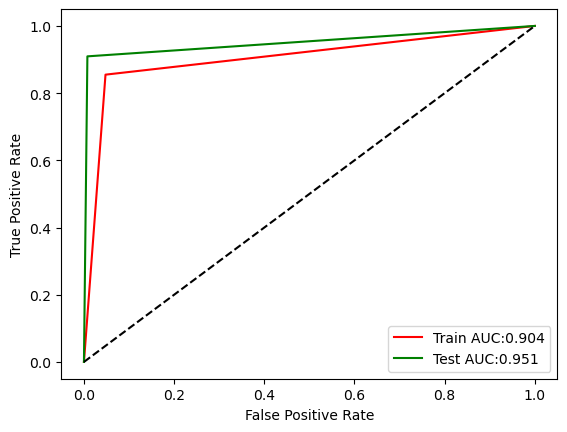

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train2, y_train_pred_df)
auc_train = roc_auc_score(y_train2, y_train_pred_df)



fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_df)
auc_test = roc_auc_score(y_test, y_test_pred_df)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On held out test data, our best model had an AUC of of 0.900. Using this model, we are able to catch 90% of the readmissions from our model that performs better than randomly selecting patients. 